In [1]:
%load_ext autoreload
%autoreload 2
%load_ext watermark
%watermark -v -n -m -p numpy,scipy,sklearn,pandas
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import nolds
import data
import mne

from lib.nolitsa.nolitsa import surrogates
from scipy.stats import ks_2samp

PROJ_ROOT = "/home/kovar/thesis_project/"
DATA_ROOT = os.path.abspath(os.path.join(PROJ_ROOT, 'data'))
PROCESSED_ROOT = os.path.abspath(os.path.join(DATA_ROOT, 'processed'))
RAW_ROOT = os.path.abspath(os.path.join(DATA_ROOT, 'raw'))
LABELED_ROOT = os.path.abspath(os.path.join(DATA_ROOT, 'labeled'))
DURATIONS_ROOT = os.path.abspath(os.path.join(DATA_ROOT, 'durations'))
print(PROJ_ROOT)
print(DATA_ROOT)
print(PROCESSED_ROOT)
import sys
sys.path.append(os.path.join(PROJ_ROOT, 'src'))
CHANNEL_NAMES = ['FP1', 'FP2', 'F3', 'F4', 'C3', 'C4', 'P3', 'P4', 'O1', 'O2',
                 'F7', 'F8', 'T3', 'T4', 'T5', 'T6', 'Fz', 'Cz', 'Pz']
META_COLUMN_NAMES = ['freq', 'RESP_4W', 'RESP_FIN', 'REMISE_FIN', 'AGE', 'SEX', 'M_1',
       'M_4', 'M_F', 'délka léčby', 'lék 1', 'lék 2', 'lék 3', 'lék 4']
META_FILE_NAME = 'DEP-POOL_Final_144.xlsx'
meta_df = pd.read_excel(os.path.join(RAW_ROOT, META_FILE_NAME), index_col='ID', names=META_COLUMN_NAMES)

patient = 75
trial = 'b'
raw_fif = mne.io.read_raw_fif(os.path.join(PROCESSED_ROOT, f'{patient}'+trial+'.fif'))
t = pd.DataFrame(raw_fif.get_data())
data = pd.DataFrame(np.transpose(t.values), columns=CHANNEL_NAMES)
# data = np.transpose(data.values)
data

Mon Jan 14 2019 

CPython 3.6.6
IPython 6.5.0

numpy 1.15.1
scipy 1.1.0
sklearn 0.19.1
pandas 0.23.4

compiler   : GCC 4.8.2 20140120 (Red Hat 4.8.2-15)
system     : Linux
release    : 4.9.0-7-amd64
machine    : x86_64
processor  : 
CPU cores  : 12
interpreter: 64bit
/home/kovar/thesis_project/
/home/kovar/thesis_project/data
/home/kovar/thesis_project/data/processed
Opening raw data file /home/kovar/thesis_project/data/processed/75b.fif...
This filename (/home/kovar/thesis_project/data/processed/75b.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
Isotrak not found
    Range : 0 ... 35665 =      0.000 ...   142.660 secs
Ready.


<ipython-input-1-da949f62895b>:38: RuntimeWarning: This filename (/home/kovar/thesis_project/data/processed/75b.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
  raw_fif = mne.io.read_raw_fif(os.path.join(PROCESSED_ROOT, f'{patient}'+trial+'.fif'))


,FP1,FP2,F3,F4,C3,C4,P3,P4,O1,O2,F7,F8,T3,T4,T5,T6,Fz,Cz,Pz
0,2.442491e-15,-6.661338e-16,1.332268e-15,-4.440892e-16,2.220446e-16,0.000000,1.332268e-15,1.110223e-16,0.000000,-3.552714e-15,2.664535e-15,-1.110223e-16,-8.881784e-16,0.000000,-2.220446e-15,-2.664535e-15,1.554312e-15,0.000000,6.661338e-16
1,-2.222493e-01,-1.794248e-01,-1.320950e-01,5.066185e-03,-6.813199e-02,-0.033892,-4.847712e-02,4.578025e-02,0.184174,4.267993e-01,3.627607e-02,7.557467e-02,9.179018e-02,-0.013100,5.284568e-02,1.674444e-01,-2.017221e-01,-0.098905,-8.775480e-02
2,-1.567644e-01,-2.119473e-01,-4.964187e-03,5.795861e-02,-9.493777e-02,-0.190870,-8.766214e-02,-2.281917e-01,0.270118,6.967338e-01,1.918604e-01,4.996076e-02,2.449296e-02,0.017856,-4.207716e-02,3.623499e-01,-7.202721e-02,-0.248060,-3.338245e-01
3,1.459731e-01,-1.687579e-01,3.087609e-01,1.909977e-01,-1.837160e-01,-0.671654,-3.123583e-01,-1.041919e+00,0.368261,1.388313e+00,5.740151e-01,4.039989e-02,-7.039905e-02,0.164472,-3.258885e-01,9.064932e-01,3.972522e-01,-0.635908,-1.074324e+00
4,5.418988e-01,5.916804e-03,4.477142e-01,3.479939e-01,-4.700088e-01,-1.614200,-1.076081e+00,-2.346884e+00,0.449950,2.964614e+00,1.035176e+00,3.764615e-01,2.687323e-01,0.538592,-6.612942e-01,1.946717e+00,1.022788e+00,-1.265019,-2.513035e+00
5,1.138061e+00,7.226574e-01,2.854178e-01,4.096199e-01,-8.794634e-01,-2.919008,-2.553720e+00,-3.873675e+00,0.105200,4.677327e+00,1.167343e+00,1.267996e+00,1.409900e+00,1.221772,-8.242930e-01,2.942215e+00,1.746632e+00,-1.658074,-4.385866e+00
6,2.079726e+00,2.129205e+00,3.319284e-01,3.130084e-01,-1.052842e+00,-4.234084,-4.493304e+00,-5.375360e+00,-1.069366,5.149654e+00,8.613189e-01,2.440135e+00,3.149487e+00,2.126599,-7.668520e-01,3.119602e+00,2.643922e+00,-1.211766,-6.140963e+00
7,3.220859e+00,3.575657e+00,1.311199e+00,7.641406e-02,-5.258554e-01,-5.075184,-6.440379e+00,-6.717163e+00,-3.172230,3.686848e+00,7.373430e-01,3.360623e+00,4.902720e+00,3.028394,-7.862191e-01,2.302231e+00,3.726988e+00,0.170457,-7.382661e+00
8,4.418520e+00,4.414011e+00,3.328306e+00,-1.947826e-01,9.182245e-01,-5.090528,-8.210596e+00,-7.882658e+00,-6.277919,3.681284e-01,1.686098e+00,4.056446e+00,6.334517e+00,3.868254,-1.392387e+00,8.728899e-01,4.972407e+00,1.948495,-8.137411e+00
9,5.980693e+00,5.179914e+00,5.711273e+00,-2.006598e-01,2.927567e+00,-4.327191,-1.001575e+01,-9.020385e+00,-10.582122,-4.587675e+00,3.939864e+00,5.352341e+00,7.463177e+00,4.892691,-2.982074e+00,-8.852310e-01,6.487380e+00,3.431747,-8.765575e+00


In [2]:
df = pd.read_pickle(os.path.join(LABELED_ROOT, 'dfa_4_320_11_offset.pkl')).dropna()
df.columns = df.columns.droplevel(1)
df
dfs = pd.read_pickle(os.path.join(LABELED_ROOT, 'lyap_auto_sigmas.pkl')).dropna()
dfs

,channel,FP1,FP2,F3,F4,C3,C4,P3,P4,O1,O2,F7,F8,T3,T4,T5,T6,Fz,Cz,Pz
,measure,lyap,lyap,lyap,lyap,lyap,lyap,lyap,lyap,lyap,lyap,lyap,lyap,lyap,lyap,lyap,lyap,lyap,lyap,lyap
patient,trial,,,,,,,,,,,,,,,,,,,


In [7]:
def plot_sigma(channel_name, surr_stats, true_stat, statname=r'$\lambda_1$'):
    plt.figure(1)
    plt.title(f'{channel_name}')
    plt.xlabel(statname)
    plt.vlines(surr_stats, 0.0, 0.5, label='surrogate')
    plt.vlines(true_stat, 0.0, 1.0, color='red', label='true')
    plt.legend()
    plt.show()

In [6]:
def compute_sigma(x, true_stat, f):
    surr_sers = [surrogates.iaaft(x)[0] for _ in range(19)]
    surr_stats = [f(surr) for surr in surr_sers]
    return np.abs(np.mean(surr_stats)-true_stat) / np.std(surr_stats), surr_stats

In [4]:
import measures

PATIENT 75, TRIAL: b
11.046652820616284
FP1 : 0.7054869729615545
11.019301116835102
FP2 : 2.2284737583893155
10.931988097286805
F3 : 2.100785533933869
11.01928866780206
F4 : 1.9435646112592544
10.727718667001893
C3 : 1.7993605698301065
10.575283465267054
C4 : 3.5439543591454457
11.876920456527037
P3 : 2.262522867341402
11.416648225237468
P4 : 0.06591010723566842
11.468246476158326
O1 : 0.45675577284739854
9.54312816289882
O2 : 1.222516830876787
11.180037872511624
F7 : 0.9256793591703013
11.192938269240125
F8 : 0.808173925595148
11.070429203952207
T3 : 0.3204439612048067
11.022578450996207
T4 : 1.7160888990273564
11.574345770236047
T5 : 2.5447533612482927
10.667419582108632
T6 : 1.7384332434383554
11.254458173699275
Fz : 1.050293128969872
11.322663883811506
Cz : 1.487987940526671
11.416531636325226
Pz : 2.5007206679997878


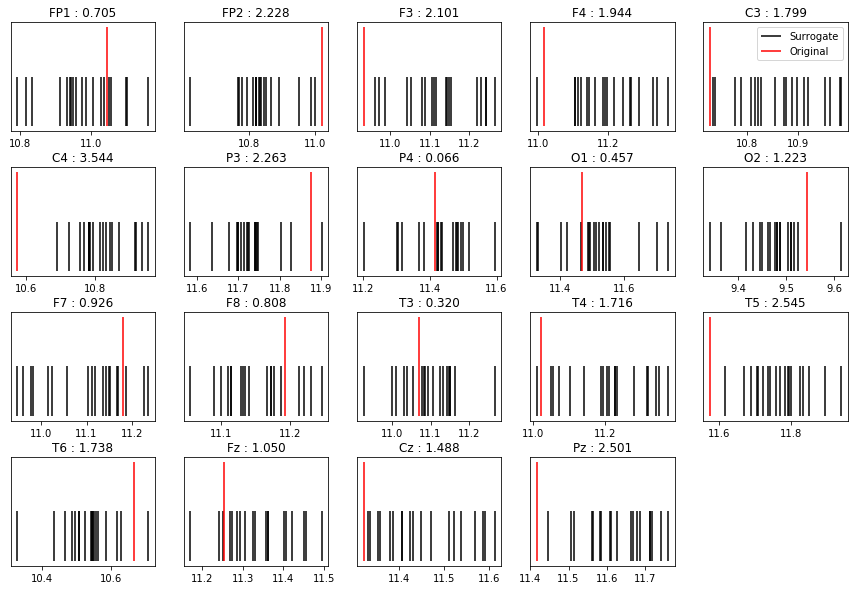

In [8]:
fig = plt.figure(1, figsize=(15,10))
fig.subplots_adjust(hspace=0.33)
print(f'PATIENT {patient}, TRIAL: {trial}')
for i, channel_name in enumerate(data.columns):
    func = measures.algorithms.compute_lyapunov
    chan_data = data.loc[:, channel_name].values[:15000]
    # true_stat = df.loc[(patient, trial), channel_name]
    true_stat = func(chan_data)
    print(true_stat)
    sigma, surr_stats = compute_sigma(chan_data, true_stat, func)
    ax = plt.subplot(4,5,i+1)
    plt.title(f'{channel_name} : {sigma:.3f}')
    # plt.xlabel('')
    plt.yticks([])
    plt.vlines(surr_stats, 0.0, 0.5, label='Surrogate')
    plt.vlines(true_stat, 0.0, 1.0, color='red', label='Original')
    if i == 4:
        plt.legend()
    print(f'{channel_name} : {sigma}')
plt.show()

In [7]:
def compute_dfa(data):
    from scipy.signal import butter, sosfilt, sosfreqz, hilbert
    from lib.nolds.nolds import measures as nmeasures

    def butter_bandpass(lowcut, highcut, fs, order=5):
        nyq = 0.5 * fs
        low = lowcut / nyq
        high = highcut / nyq
        sos = butter(order, [low, high], analog=False,
                                     btype='band', output='sos')
        return sos

    def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
        sos = butter_bandpass(lowcut, highcut, fs, order=order)
        y = sosfilt(sos, data)
        return y

    # lowcut = 3
    # highcut = 7
    # fs = 250

    # y = butter_bandpass_filter(data, lowcut, highcut, fs, order=4)
    # amplitude_envelope = np.abs(hilbert(y))

    nvals = nmeasures.logarithmic_n(4, 320, 1.1)
    return nmeasures.dfa(data, nvals=nvals, overlap=True,
                        offset_n=50)